In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv('/users/he145100/OneDrive - WA Health/Test Data/vw_emergency_episode_50k.csv', dtype={
                                                                               'standard_australian_classification_of_countries_2011_for_country_of_birth':'str', 
'ambulance_number':'str'})

In [3]:
list(dataset.columns)

['establishment_code',
 'sex',
 'ethnicity',
 'marital_status',
 'interpreter_required',
 'employment_status',
 'occupation',
 'triage_category',
 'visit_type',
 'mode_of_arrival',
 'referral_source',
 'primary_diagnosis',
 'presenting_complaint',
 'major_diagnostic_category',
 'human_intent_of_injury',
 'feeder_system',
 'external_cause_of_injury',
 'state',
 'claim_type',
 'treating_doctor_type',
 'senior_doctor_type',
 'ambulance_number',
 'statistical_area_2_2016',
 'payment_classification',
 'aboriginality',
 'primary_diagnosis_ICD10AM_chapter',
 'principal_diagnosis_system_code_EDIS',
 'additional_diagnosis_system_code_EDIS',
 'standard_australian_classification_of_countries_2011_for_country_of_birth',
 'australian_postcode',
 'metropolitan_hospital_flag',
 'rural_hospital_flag',
 'local_health_network',
 'attendance_length_of_episode',
 'attendance',
 'attendance_with_length_of_episode_less_than_or_equal_to_4_hours',
 'attendance_with_length_of_episode_less_than_or_equal_to_4_ho

In [4]:
dataset.shape

(50000, 68)

In [5]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (47500, 68)
Unseen Data For Predictions: (2500, 68)


In [2]:
from pycaret.classification import *

In [7]:
#Ordinal Encoding
#When the categorical features in the dataset contain variables with intrinsic natural order such as Low, Medium, and High, 
#these must be encoded differently than nominal variables (where there is no intrinsic order for e.g. Male or Female). 
#This can be achieved using  the ordinal_features parameter in the setup function that accepts a dictionary with feature 
#names and the levels in the increasing order from lowest to highest.

#triage rating needs to setup as ordinal 
#ordinal_features = {'triage_category' : ['7','5','4','3','2','1']},
admission_test_1 = setup(data = data, target = 'admission',
                         normalize = True,
                         ignore_features=['attendance_length_of_episode', 'admission_with_length_of_episode_less_than_or_equal_to_4_hours',
 'admission_with_length_of_episode_less_than_or_equal_to_4_hours_denominator'],
                         ordinal_features = {'triage_category' : ['7','5','4','3','2','1']},
                         high_cardinality_features = ['presenting_complaint','australian_postcode','primary_diagnosis','primary_diagnosis_ICD10AM_chapter',
                                                      'principal_diagnosis_system_code_EDIS'], 
                         bin_numeric_features = ['age'],
                         remove_outliers = True,
                         #training dataset has an unequal distribution of target class it can be 
                         #fixed using the fix_imbalance parameter
                         fix_imbalance = True,
                         #use_gpu = True,
                         session_id=123) 

,Description,Value
0,session_id,123
1,Target,admission
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(47500, 68)"
5,Missing Values,True
6,Numeric Features,4
7,Categorical Features,60
8,Ordinal Features,True
9,High Cardinality Features,True


In [11]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9536,0.9887,0.9915,0.8503,0.9155,0.8837,0.8887,180.0250
svm,SVM - Linear Kernel,0.9521,0.0000,0.9921,0.8458,0.9131,0.8804,0.8857,92.1320
ada,Ada Boost Classifier,0.9505,0.9881,0.9849,0.8454,0.9098,0.8759,0.8808,112.6800
gbc,Gradient Boosting Classifier,0.9501,0.9884,0.9956,0.8383,0.9102,0.8760,0.8822,123.1210
et,Extra Trees Classifier,0.9445,0.9818,0.9115,0.8751,0.8929,0.8555,0.8559,104.2270
dt,Decision Tree Classifier,0.9370,0.9203,0.8862,0.8684,0.8771,0.8348,0.8350,90.8240
rf,Random Forest Classifier,0.9366,0.9792,0.8800,0.8716,0.8757,0.8332,0.8333,100.3410
ridge,Ridge Classifier,0.9357,0.0000,0.9985,0.7985,0.8874,0.8431,0.8534,98.6760
knn,K Neighbors Classifier,0.8366,0.9277,0.9380,0.6172,0.7444,0.6317,0.6617,425.8190
qda,Quadratic Discriminant Analysis,0.7874,0.6892,0.4174,0.6199,0.4984,0.3702,0.3820,273.7240


In [4]:
lr = create_model('lr')

NameError: name '_all_models_internal' is not defined

In [9]:
print(lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [10]:
# tune model sklearn
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9513,0.9875,0.9888,0.8453,0.9114,0.8781,0.8832
1,0.9531,0.9893,0.9888,0.8507,0.9145,0.8825,0.8873
2,0.9554,0.9887,0.9950,0.8535,0.9188,0.8883,0.8933
3,0.9528,0.9893,0.9950,0.8462,0.9146,0.8823,0.8878
4,0.9550,0.9883,0.9913,0.8548,0.9180,0.8873,0.8919
5,0.9544,0.9892,0.9863,0.8561,0.9166,0.8854,0.8896
6,0.9557,0.9901,0.9875,0.8588,0.9187,0.8884,0.8925
7,0.9541,0.9886,0.9900,0.8527,0.9162,0.8848,0.8895
8,0.9576,0.9886,0.9950,0.8598,0.9225,0.8935,0.8980


In [13]:
# tune model scikit-optimize
tune_model(lr, search_library = 'scikit-optimize')
#pip install scikit-optimize

ImportError: 'scikit-optimize' requires scikit-optimize package to be installed. Do: pip install scikit-optimize

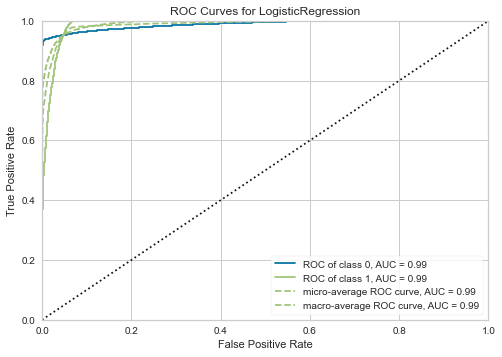

In [14]:
plot_model(tuned_lr, plot = 'auc')

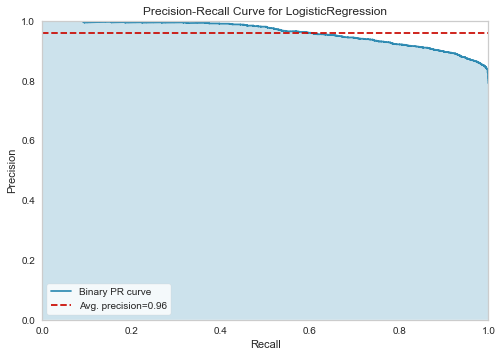

In [15]:
plot_model(tuned_lr, plot = 'pr')

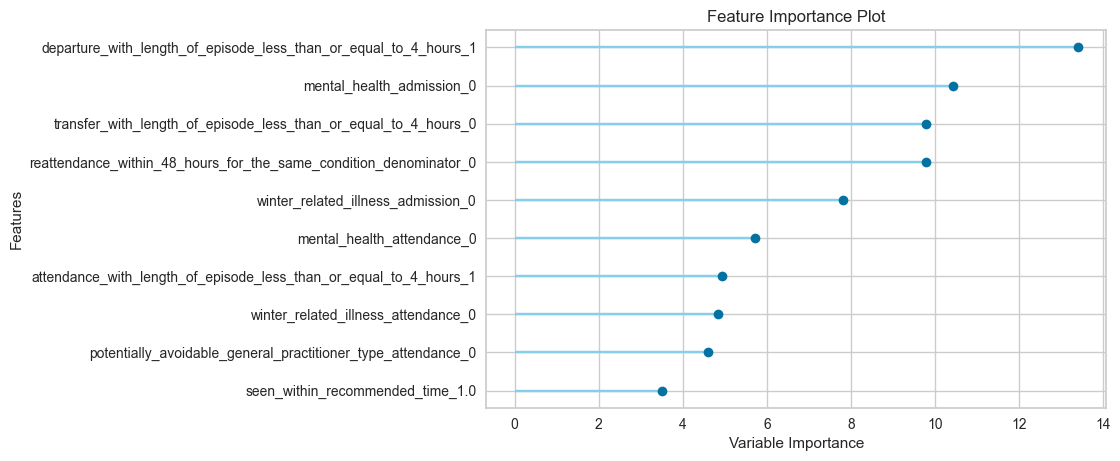

In [16]:
plot_model(tuned_lr, plot='feature')

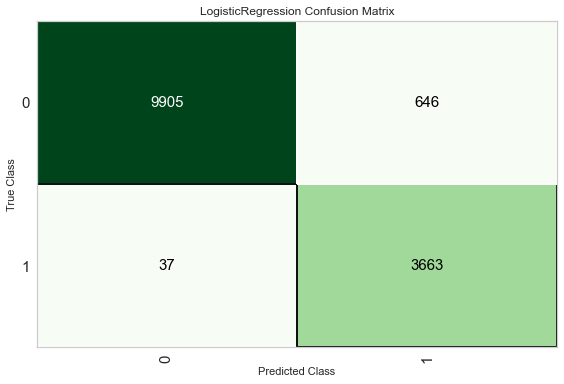

In [17]:
plot_model(tuned_lr, plot = 'confusion_matrix')
#https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62
#True Positive:
#Interpretation: You predicted positive and it’s true.
#You predicted that a woman is pregnant and she actually is.
#True Negative:
#Interpretation: You predicted negative and it’s true.
#You predicted that a man is not pregnant and he actually is not.
#False Positive: (Type 1 Error)
#Interpretation: You predicted positive and it’s false.
#You predicted that a man is pregnant but he actually is not.
#False Negative: (Type 2 Error)
#Interpretation: You predicted negative and it’s false.
#You predicted that a woman is not pregnant but she actually is.

In [18]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [3]:
predict_model(tuned_lr)

NameError: name 'tuned_lr' is not defined

In [72]:
final_ada = finalize_model(tuned_ada)

In [73]:
#Final ADA parameters for deployment
print(final_ada)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.2,
                   n_estimators=230, random_state=123)


In [76]:
unseen_predictions = predict_model(final_ada, data=data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.9560,0.9896,0.9914,0.8697,0.9266,0.8953,0.8993


,establishment_code,sex,ethnicity,marital_status,interpreter_required,employment_status,occupation,triage_category,visit_type,mode_of_arrival,...,affected_by_drugs_only,affected_by_drugs_and_or_alcohol,likely_meth_related_attendance,self_harm_attendance,suicide_attempt_or_at_risk_of_suicide,mental_health_consult,age,emergency_department_information_system_covid19_flag,Label,Score
0,277,1,4,5,2,7.0,NaN,4,1,3,...,0,0,0,0,0,NaN,83,0,0,0.5192
1,208,1,1,1,2,8.0,NaN,2,15,3,...,0,0,0,0,0,NaN,34,0,1,0.5050
2,105,2,4,3,2,7.0,NaN,2,1,3,...,0,0,0,0,0,NaN,82,0,1,0.5020
3,645,2,4,1,2,8.0,NaN,4,1,1,...,0,0,0,0,0,NaN,48,0,0,0.5945
4,105,2,4,1,2,2.0,NaN,3,1,1,...,0,0,0,0,0,NaN,21,0,0,0.5058


In [84]:
unseen_predictions[["admission","Label"]].head(50)

,admission,Label
0,0,0
1,0,1
2,0,1
3,0,0
4,0,0
5,0,1
6,0,0
7,0,1
8,0,0
9,0,0


In [77]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['admission'], unseen_predictions['Label'], metric = 'Accuracy')

0.956

In [1]:
save_model(final_ada, model_name = 'C:/Users/he145100/ada_powerbi')

NameError: name 'save_model' is not defined